## Loading csv file

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('eCommerce_Customer_support_data.csv',delimiter=",")

C:\Users\Vikas\AppData\Local\Temp\ipykernel_9920\2704373164.py:1: DtypeWarning: Columns (12,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('eCommerce_Customer_support_data.csv',delimiter=",")


In [3]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20
1,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01-08-2023 11:13,01-08-2023 11:47,01-08-2023 00:00,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
2,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01-08-2023 12:52,01-08-2023 12:54,01-08-2023 00:00,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
3,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01-08-2023 20:16,01-08-2023 20:38,01-08-2023 00:00,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
4,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01-08-2023 20:56,01-08-2023 21:16,01-08-2023 00:00,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5


In [4]:
print("Initial shape:", df.shape)
print("Null values per column:\n", df.isnull().sum())

Initial shape: (85908, 20)
Null values per column:
 Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


In [6]:
irrelevant_cols = ['Unique id', 'Order_id']
df_cleaned=df.drop(columns=irrelevant_cols,axis=1)

In [8]:
date_cols = ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']
for col in date_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = pd.to_datetime(df_cleaned[col], dayfirst=True, errors='coerce')
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].min())

C:\Users\Vikas\AppData\Local\Temp\ipykernel_9920\2790018050.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned[col] = pd.to_datetime(df_cleaned[col], dayfirst=True, errors='coerce')
C:\Users\Vikas\AppData\Local\Temp\ipykernel_9920\2790018050.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned[col] = pd.to_datetime(df_cleaned[col], dayfirst=True, errors='coerce')
C:\Users\Vikas\AppData\Local\Temp\ipykernel_9920\2790018050.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned[col] = pd.to_datetime(df_cleaned[col], dayfirst=True, errors='coerce'

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85908 entries, 0 to 85907
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   channel_name             85908 non-null  object        
 1   category                 85908 non-null  object        
 2   Sub-category             85908 non-null  object        
 3   Customer Remarks         28743 non-null  object        
 4   order_date_time          85908 non-null  datetime64[ns]
 5   Issue_reported at        85908 non-null  datetime64[ns]
 6   issue_responded          85908 non-null  datetime64[ns]
 7   Survey_response_Date     85908 non-null  datetime64[ns]
 8   Customer_City            17080 non-null  object        
 9   Product_category         17197 non-null  object        
 10  Item_price               17207 non-null  object        
 11  connected_handling_time  243 non-null    object        
 12  Agent_name               85908 n

In [11]:
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col] = df_cleaned[col].fillna('Missing')
    elif df_cleaned[col].dtype=='int64':
        df_cleaned[col]=df_cleaned[col].fillna(df_cleaned[col].median())
    elif df_cleaned[col].dtype=='float64':
        df_cleaned[col]=df_cleaned[col].fillna(df_cleaned[col].median())
    else:
        df_cleaned[col]=df_cleaned[col].fillna(df_cleaned[col].min())

In [12]:
df_cleaned=df_cleaned.drop(columns='connected_handling_time',axis=1)

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85908 entries, 0 to 85907
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channel_name          85908 non-null  object        
 1   category              85908 non-null  object        
 2   Sub-category          85908 non-null  object        
 3   Customer Remarks      85908 non-null  object        
 4   order_date_time       85908 non-null  datetime64[ns]
 5   Issue_reported at     85908 non-null  datetime64[ns]
 6   issue_responded       85908 non-null  datetime64[ns]
 7   Survey_response_Date  85908 non-null  datetime64[ns]
 8   Customer_City         85908 non-null  object        
 9   Product_category      85908 non-null  object        
 10  Item_price            85908 non-null  object        
 11  Agent_name            85908 non-null  object        
 12  Supervisor            85908 non-null  object        
 13  Manager         

#### Converting df['Item_price'].dtypes into 'int'

In [16]:
df_cleaned['Item_price'].dtypes

dtype('O')

In [19]:
df_cleaned = df_cleaned[pd.to_numeric(df_cleaned['Item_price'], errors='coerce').notnull()]

In [21]:
df_cleaned['Item_price'] = df_cleaned['Item_price'].astype(float).astype(int)

In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17206 entries, 12 to 85902
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channel_name          17206 non-null  object        
 1   category              17206 non-null  object        
 2   Sub-category          17206 non-null  object        
 3   Customer Remarks      17206 non-null  object        
 4   order_date_time       17206 non-null  datetime64[ns]
 5   Issue_reported at     17206 non-null  datetime64[ns]
 6   issue_responded       17206 non-null  datetime64[ns]
 7   Survey_response_Date  17206 non-null  datetime64[ns]
 8   Customer_City         17206 non-null  object        
 9   Product_category      17206 non-null  object        
 10  Item_price            17206 non-null  int64         
 11  Agent_name            17206 non-null  object        
 12  Supervisor            17206 non-null  object        
 13  Manager             

In [23]:
df_cleaned.isnull().sum() # Now my data doesn't include any null values 

channel_name            0
category                0
Sub-category            0
Customer Remarks        0
order_date_time         0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Customer_City           0
Product_category        0
Item_price              0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64

## Data grouping and visualization

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
sns.set_theme(style='darkgrid')

#### Grouping chaneel_name with item_price

In [33]:
channel_item_price=df_cleaned.groupby('channel_name')['Item_price'].sum().sort_values(ascending=False).reset_index()


In [34]:
channel_item_price

,channel_name,Item_price
0,Inbound,78056538
1,Outcall,11653798
2,Email,7688956


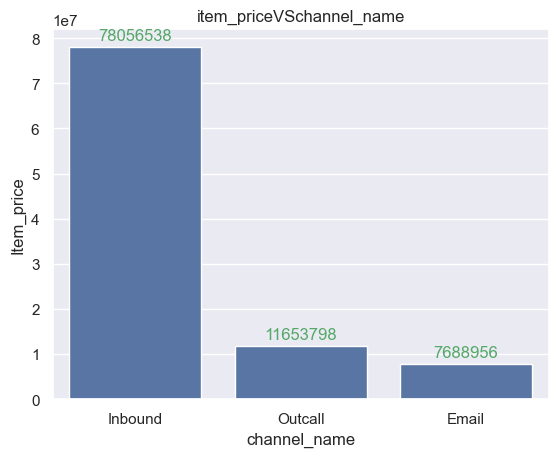

In [63]:
chennel_itemprice_barplot=sns.barplot(x='channel_name',y='Item_price',data=channel_item_price)
for container in chennel_itemprice_barplot.containers:
    chennel_itemprice_barplot.bar_label(container, fmt='%.0f', padding=3,c="g")
plt.title("item_priceVSchannel_name")
plt.show()

#### Grouping category with item price

In [39]:
category_itemprice=df_cleaned.groupby('category')['Item_price'].sum().sort_values(ascending=False).reset_index()

In [48]:
category_itemprice

,category,Item_price
0,Order Related,49170562
1,Returns,30124608
2,Refund Related,7408265
3,Cancellation,6572866
4,Feedback,2184274
5,Offers & Cashback,902065
6,Payments related,512537
7,Shopzilla Related,273115
8,Product Queries,156192
9,Others,94808


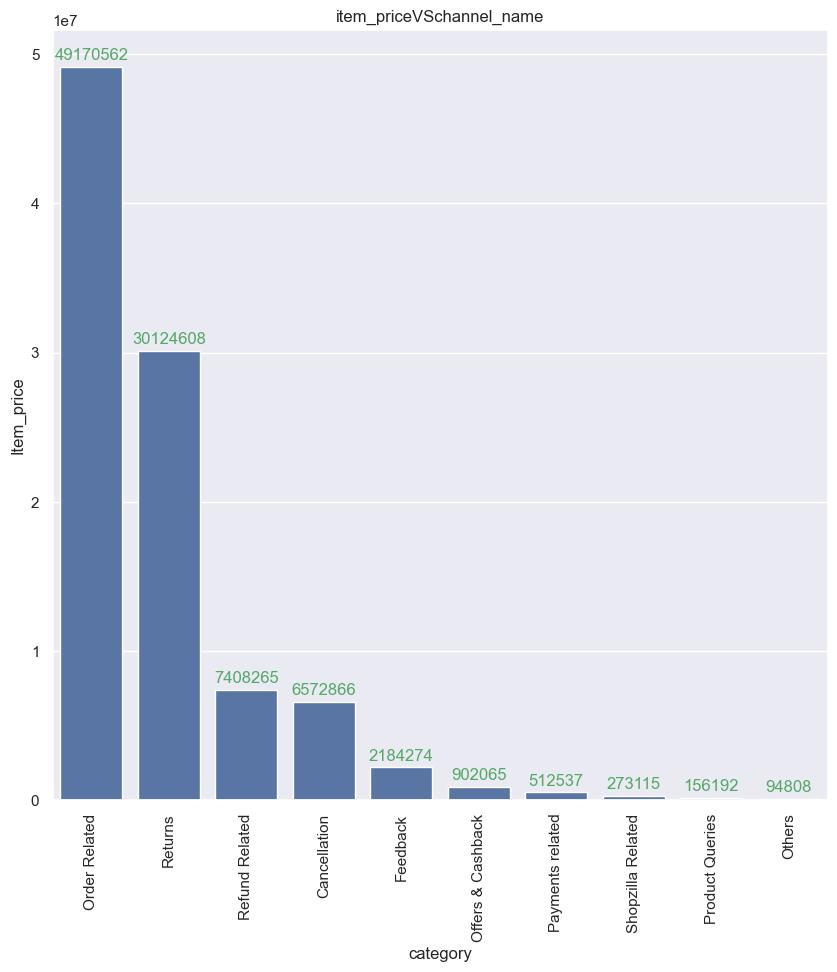

In [61]:
plt.figure(figsize=(10,10))
category_itemprice_barplot=sns.barplot(x='category',y='Item_price',data=category_itemprice)
for container in category_itemprice_barplot.containers:
    category_itemprice_barplot.bar_label(container, fmt='%.0f', padding=3,c="g")
plt.title("item_priceVSchannel_name")
plt.xticks(rotation=90)
plt.show()

In [64]:
agentshift_itemprice=df_cleaned.groupby('Agent Shift')['Item_price'].sum().sort_values(ascending=False).reset_index()

In [65]:
agentshift_itemprice

,Agent Shift,Item_price
0,Morning,49644527
1,Evening,37318326
2,Afternoon,5515025
3,Split,3333867
4,Night,1587547


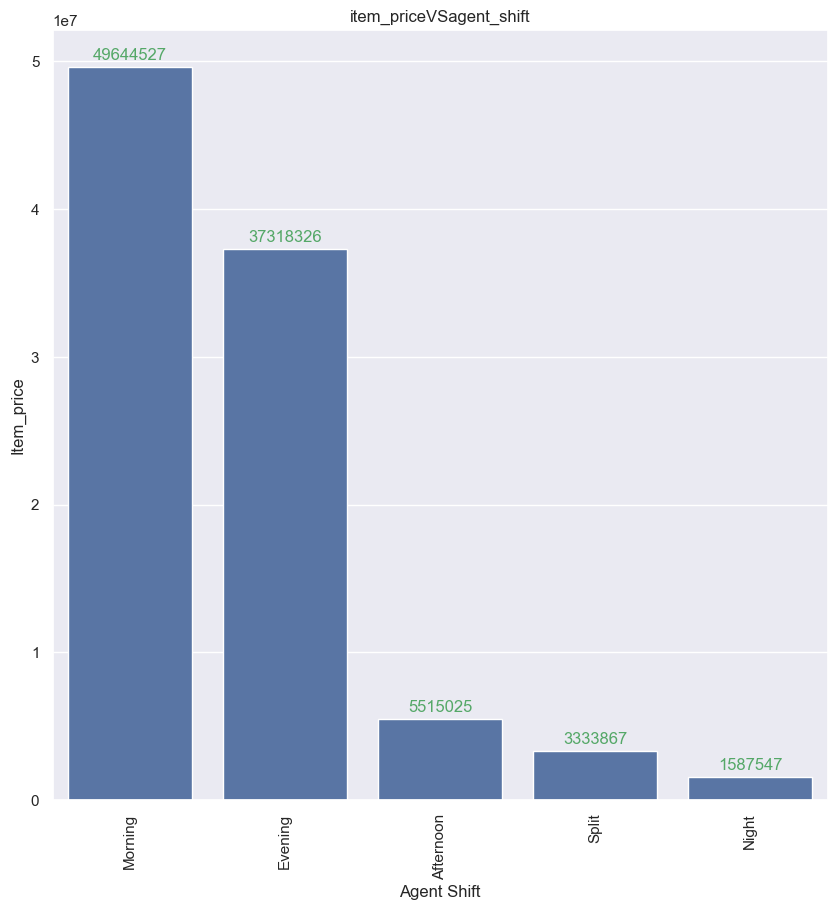

In [71]:
plt.figure(figsize=(10,10))
agent_shift_itemprice_barplot=sns.barplot(x='Agent Shift',y='Item_price',data=agentshift_itemprice)
for container in agent_shift_itemprice_barplot.containers:
    agent_shift_itemprice_barplot.bar_label(container, fmt='%.0f', padding=3,c="g")
plt.title("item_priceVSagent_shift")
plt.xticks(rotation=90)
plt.show()

In [73]:
df_cleaned['Customer Remarks']

12                                        Very bad
17                                         Missing
20                                        All good
25                                         Missing
26             Issue not resolved pathetic service
                           ...                    
85879                                      Missing
85882    Clear all my problem thanks for Shopzilla
85887                                      Missing
85901                                      Missing
85902                                      Missing
Name: Customer Remarks, Length: 17206, dtype: object

#### Text processing : removing special characters, removing stopwords, removing punctuation

In [78]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [91]:
stop_words=set(stopwords.words('english'))
punctuations=list(string.punctuation)

In [92]:
stop_words,punctuations

({'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  "he'd",
  "he'll",
  "he's",
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  "i'd",
  "i'll",
  "i'm",
  "i've",
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it'd",
  "it'll",
  "it's",
  'its',
  'itself',
  'just',
  'll',
  'm',
  'ma',
  'me',
  'mightn',
  "mightn't",
  'more',
  'most',
  'mustn',
  "mustn't",
  'my',
  'mys

In [93]:

stop_words.update(punctuations)


In [94]:
def cleaned_text(text):
    if pd.isnull(text):
        return ''
    # Converting into lowercase before tokenizing words
    text=text.lower()
    # Removing special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stop words
    cleaned_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return ' '.join(cleaned_tokens)

In [95]:
df_cleaned['Customer Remarks']=df_cleaned['Customer Remarks'].apply(cleaned_text)

In [96]:
df_cleaned['Customer Remarks']

12                                   bad
17                               missing
20                                  good
25                               missing
26       issue resolved pathetic service
                      ...               
85879                            missing
85882     clear problem thanks shopzilla
85887                            missing
85901                            missing
85902                            missing
Name: Customer Remarks, Length: 17206, dtype: object

## Label encoding

In [98]:
columns_to_encode=['channel_name','category','Sub-category','Customer Remarks','Customer_City','Product_category','Tenure Bucket','Agent Shift']

In [99]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le=LabelEncoder() # Creating object

In [103]:
for col in columns_to_encode:
    df_cleaned[col]=le.fit_transform(df_cleaned[col])

In [106]:
df_cleaned['channel_name'],df_cleaned['category'],df_cleaned['Customer Remarks'] # Text has been converted it into labels

(12       1
 17       1
 20       1
 25       1
 26       1
         ..
 85879    1
 85882    1
 85887    1
 85901    1
 85902    1
 Name: channel_name, Length: 17206, dtype: int64,
 12       3
 17       8
 20       3
 25       8
 26       3
         ..
 85879    1
 85882    3
 85887    8
 85901    3
 85902    3
 Name: category, Length: 17206, dtype: int64,
 12        112
 17       1685
 20        997
 25       1685
 26       1477
          ... 
 85879    1685
 85882     379
 85887    1685
 85901    1685
 85902    1685
 Name: Customer Remarks, Length: 17206, dtype: int64)

In [119]:
x=df_cleaned[columns_to_encode]
x.shape

(17206, 8)

In [121]:
y=df['CSAT Score']

In [122]:
y = y[:len(x)] 

In [125]:
y.shape

(17206,)

In [123]:
from sklearn.model_selection import train_test_split

In [126]:
# Splitting intp training and testing part
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## Feature scaling

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
st=StandardScaler()

In [129]:
x_train_scaled=st.fit_transform(x_train)
x_test_scaled=st.transform(x_test)

## ANN model

In [158]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [164]:
model= Sequential(
    [
        Dense(128,activation='relu',input_shape=(x_train_scaled.shape[1],)),Dropout(0.3),
        Dense(64,activation='relu'),Dropout(0.2),
        Dense(len(y_train.unique())+1,activation='softmax')  
    ]
)

In [165]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,798 (38.27 KB)

 Trainable params: 9,798 (38.27 KB)

 Non-trainable params: 0 (0.00 B)

#### Compilation

In [166]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  
# It includes updation weights

In [167]:
x_train_scaled.dtype

dtype('float64')

In [168]:
y_train.dtype

dtype('float32')

In [169]:
y_train = y_train.astype('float32')

In [170]:
y_train.dtype

dtype('float32')

In [171]:
history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=32)

Epoch 1/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6503 - loss: 1.1202
Epoch 2/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6898 - loss: 0.9853
Epoch 3/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6907 - loss: 0.9776
Epoch 4/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6932 - loss: 0.9655
Epoch 5/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6926 - loss: 0.9675
Epoch 6/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6896 - loss: 0.9663
Epoch 7/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6951 - loss: 0.9641
Epoch 8/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6810 - loss: 0.9900
Epoch 9/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6894 - loss: 0.9662
Epoch 10/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6883 - loss: 0.9639
Epoch 11/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6934 - loss: 0.9561
Epoch 12/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

In [178]:
y_test.dtypes,x_test_scaled.dtype

(dtype('O'), dtype('float64'))

In [180]:
y_test = y_test[~y_test.str.contains('Column', na=False)]

In [184]:
y_test.shape,x_test_scaled.shape

((5161,), (5162, 8))

In [ ]:
test_accuracy = model.evaluate(x_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)